In [76]:
!pip install intel-tensorflow  #oneAPI Library
!pip install keras
!pip install pandas
!pip install intel-numpy       #oneAPI Library
!pip install jupyter
!pip install notebook
!pip install tqdm
!pip install opencv-python-headless   #oneAPI Library

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [77]:
!pip install intel_extension_for_tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [78]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import cv2
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img

In [79]:
TRAIN_DIR = 'image/train'
TEST_DIR = 'image/test'

In [80]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [81]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

neutral completed
angry completed
fear completed
.ipynb_checkpoints completed
happy completed
surprise completed
sad completed
disgust completed


In [82]:
print(train)

                              image    label
0      image/train/neutral/1119.jpg  neutral
1        image/train/neutral/31.jpg  neutral
2      image/train/neutral/1080.jpg  neutral
3        image/train/neutral/83.jpg  neutral
4       image/train/neutral/502.jpg  neutral
...                             ...      ...
6176  image/train/disgust/15691.jpg  disgust
6177   image/train/disgust/5964.jpg  disgust
6178  image/train/disgust/17719.jpg  disgust
6179  image/train/disgust/11873.jpg  disgust
6180  image/train/disgust/12179.jpg  disgust

[6181 rows x 2 columns]


In [83]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

neutral completed
angry completed
fear completed
.ipynb_checkpoints completed
happy completed
surprise completed
sad completed
disgust completed


In [84]:
print(test)
print(test['image'])

                             image    label
0     image/test/neutral/33468.jpg  neutral
1     image/test/neutral/14190.jpg  neutral
2     image/test/neutral/23012.jpg  neutral
3     image/test/neutral/15168.jpg  neutral
4     image/test/neutral/21962.jpg  neutral
...                            ...      ...
5057   image/test/disgust/8585.jpg  disgust
5058  image/test/disgust/13652.jpg  disgust
5059   image/test/disgust/8415.jpg  disgust
5060  image/test/disgust/28987.jpg  disgust
5061   image/test/disgust/7068.jpg  disgust

[5062 rows x 2 columns]
0       image/test/neutral/33468.jpg
1       image/test/neutral/14190.jpg
2       image/test/neutral/23012.jpg
3       image/test/neutral/15168.jpg
4       image/test/neutral/21962.jpg
                    ...             
5057     image/test/disgust/8585.jpg
5058    image/test/disgust/13652.jpg
5059     image/test/disgust/8415.jpg
5060    image/test/disgust/28987.jpg
5061     image/test/disgust/7068.jpg
Name: image, Length: 5062, dtype: object

In [85]:
from tqdm.notebook import tqdm

In [86]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        if os.path.isfile(image):  # Check if the path is a regular file
            img = load_img(image, grayscale=True)
            img = np.array(img)
            features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [87]:
train_features = extract_features(train['image'])

  0%|          | 0/6181 [00:00<?, ?it/s]

/home/u200771/.local/lib/python3.9/site-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [88]:
test_features = extract_features(test['image'])

  0%|          | 0/5062 [00:00<?, ?it/s]

In [89]:
x_train = train_features/255.0
x_test = test_features/255.0

In [90]:
from sklearn.preprocessing import LabelEncoder

In [91]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [92]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [93]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [94]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [95]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [96]:
y_train_processed = y_train
model.fit(x=x_train, y=y_train_processed, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
49/49 [==============================] - 37s 697ms/step - loss: 1.7609 - accuracy: 0.2195 - val_loss: 2.2126 - val_accuracy: 0.2250
Epoch 2/10
49/49 [==============================] - 33s 682ms/step - loss: 1.7364 - accuracy: 0.2291 - val_loss: 2.1515 - val_accuracy: 0.2011
Epoch 3/10
49/49 [==============================] - 32s 665ms/step - loss: 1.7332 - accuracy: 0.2294 - val_loss: 2.2571 - val_accuracy: 0.2199
Epoch 4/10
49/49 [==============================] - 33s 678ms/step - loss: 1.7289 - accuracy: 0.2417 - val_loss: 2.2553 - val_accuracy: 0.2011
Epoch 5/10
49/49 [==============================] - 33s 682ms/step - loss: 1.7285 - accuracy: 0.2322 - val_loss: 2.2858 - val_accuracy: 0.2250
Epoch 6/10
49/49 [==============================] - 33s 687ms/step - loss: 1.7276 - accuracy: 0.2252 - val_loss: 2.2421 - val_accuracy: 0.2011
Epoch 7/10
49/49 [==============================] - 33s 669ms/step - loss: 1.7280 - accuracy: 0.2351 - val_loss: 2.2671 - val_accuracy: 0.2396

In [97]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

/home/u200771/.local/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [98]:
from keras.models import model_from_json

In [99]:
json_file = open("facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("facialemotionmodel.h5")

In [100]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [102]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [104]:
image = 'image/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 [==============================] - 0s 22ms/step
model prediction is  sad


In [105]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 [==============================] - 0s 22ms/step
model prediction is  sad


/home/u200771/.local/lib/python3.9/site-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


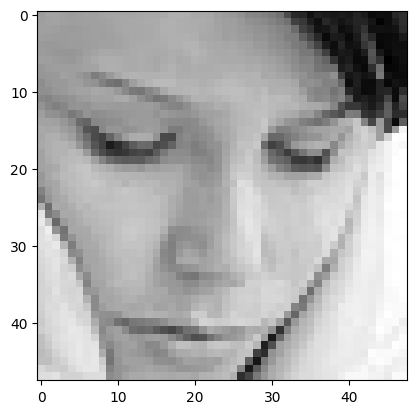

In [106]:
image = 'image/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 [==============================] - 0s 21ms/step
model prediction is  sad


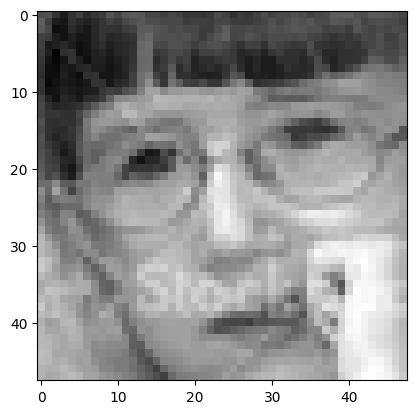

In [107]:
image = 'image/train/fear/10451.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 [==============================] - 0s 20ms/step
model prediction is  disgust


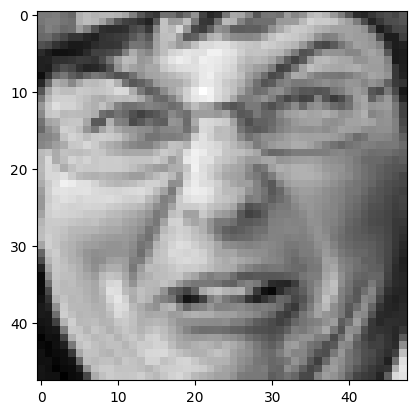

In [109]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 24ms/step
model prediction is  happy


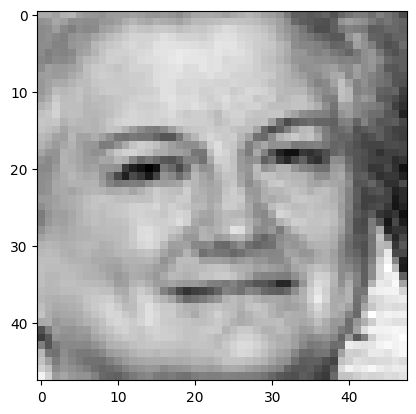

In [110]:
image = 'image/train/happy/100.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 [==============================] - 0s 25ms/step
model prediction is  surprise


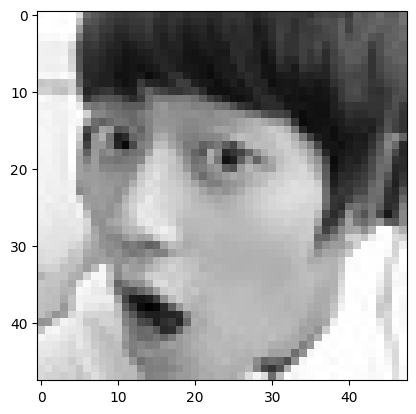

In [111]:
image = 'images/train/surprise/10080.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [112]:
import cv2
from keras.models import model_from_json
import numpy as np
# from keras_preprocessing.image import load_img

json_file = open("facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)

model.load_weights("facialemotionmodel.h5")
haar_file=cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade=cv2.CascadeClassifier(haar_file)

def extract_features(image):
    feature = np.array(image)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

webcam=cv2.VideoCapture(0)
labels = {0 : 'angry', 1 : 'disgust', 2 : 'fear', 3 : 'happy', 4 : 'neutral', 5 : 'sad', 6 : 'surprise'}
while True:
    i,im=webcam.read()
    gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(im,1.3,5)
    try: 
        for (p,q,r,s) in faces:
            image = gray[q:q+s,p:p+r]
            cv2.rectangle(im,(p,q),(p+r,q+s),(255,0,0),2)
            image = cv2.resize(image,(48,48))
            img = extract_features(image)
            pred = model.predict(img)
            prediction_label = labels[pred.argmax()]
            # print("Predicted Output:", prediction_label)
            # cv2.putText(im,prediction_label)
            cv2.putText(im, '% s' %(prediction_label), (p-10, q-10),cv2.FONT_HERSHEY_COMPLEX_SMALL,2, (0,0,255))
        cv2.imshow("Output",im)
        cv2.waitKey(27)
    except cv2.error:
        pass

[ WARN:0@5114.908] global cap_v4l.cpp:982 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@5114.943] global obsensor_uvc_stream_channel.cpp:156 getStreamChannelGroup Camera index out of range


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
